# question 1

Min-Max scaling, also known as normalization, is a popular data preprocessing technique used to transform numeric features in a dataset to a specific range, typically between 0 and 1. It rescales the values by subtracting the minimum value and dividing by the difference between the maximum and minimum values. Min Max scaling is generally used in case of scaling images that is in Deep Learning.

In [1]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

In [2]:
df = pd.DataFrame({
    'height' : [130 , 120 , 144 , 122 ,110],
    'weight' : [34 , 54 , 75, 80 , 66]
})

In [3]:
df

,height,weight
0,130,34
1,120,54
2,144,75
3,122,80
4,110,66


In [4]:
#create an instance for MinMaxScalar
scalar = MinMaxScaler()

In [5]:
#fit and transform the data
scalar.fit_transform(df)

array([[0.58823529, 0.        ],
       [0.29411765, 0.43478261],
       [1.        , 0.89130435],
       [0.35294118, 1.        ],
       [0.        , 0.69565217]])

In [7]:
scaled_df = pd.DataFrame(scalar.fit_transform(df) , columns = ['scaled_height' , 'scaled_weight'])
scaled_df

,scaled_height,scaled_weight
0,0.588235,0.000000
1,0.294118,0.434783
2,1.000000,0.891304
3,0.352941,1.000000
4,0.000000,0.695652


# question 2
The Unit Vector technique, also known as normalization or vector normalization, is another feature scaling method used to transform numeric features in a dataset. Unlike Min-Max scaling, which scales the values to a specific range, the Unit Vector technique scales the values to have a magnitude of 1 while preserving their direction.By using the Unit Vector technique, we ensure that the magnitude of the vector becomes 1 while preserving the relative direction of the values. This scaling technique is particularly useful when the direction of the values is more important than their actual magnitude.



In [8]:
from sklearn.preprocessing import normalize
import pandas as pd

In [10]:
df = pd.DataFrame({
    'X' : [3 , 1 , 5 , 2 , 4],
    'Y' : [4 , 2 , 6, 1 , 3]
})

df

,X,Y
0,3,4
1,1,2
2,5,6
3,2,1
4,4,3


In [15]:
normalize(df[['X' , 'Y']])

array([[0.6       , 0.8       ],
       [0.4472136 , 0.89442719],
       [0.6401844 , 0.76822128],
       [0.89442719, 0.4472136 ],
       [0.8       , 0.6       ]])

In [20]:
scaled_df = pd.DataFrame(normalize(df[['X' , 'Y']]) , columns = ['normalized_X' , 'normalized_Y'])
scaled_df

,normalized_X,normalized_Y
0,0.600000,0.800000
1,0.447214,0.894427
2,0.640184,0.768221
3,0.894427,0.447214
4,0.800000,0.600000


# question 3
PCA, short for Principal Component Analysis, is a popular dimensionality reduction technique used to transform a high-dimensional dataset into a lower-dimensional space. It accomplishes this by identifying the principal components, which are new orthogonal axes that capture the maximum amount of variance in the data.PCA, short for Principal Component Analysis, is a popular dimensionality reduction technique used to transform a high-dimensional dataset into a lower-dimensional space. It accomplishes this by identifying the principal components, which are new orthogonal axes that capture the maximum amount of variance in the data.

Suppose we have a dataset with four features: age, height, weight, and income. We want to reduce the dimensionality of the dataset while retaining as much information as possible.

Standardize the data: We standardize the features to have zero mean and unit variance, ensuring they are on a similar scale.

Compute the covariance matrix: Based on the standardized data, we calculate the covariance matrix, which captures the relationships and variances between the features.

Compute the eigenvectors and eigenvalues: We calculate the eigenvectors and eigenvalues of the covariance matrix. Let's say the eigenvalues obtained are [2.5, 1.8, 0.9, 0.3], indicating the amount of variance captured by each principal component.

Select the principal components: Since the first two eigenvalues are relatively high compared to the others, we choose the corresponding eigenvectors (principal components) associated with the highest eigenvalues. In this case, we select the first two principal components.

Transform the data: We project the original data onto the new axes defined by the selected principal components. The transformed data will have a reduced dimensionality with two features (the selected principal components).

In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Sample data
data = np.array([[30, 160, 60, 50000],
                 [35, 165, 65, 60000],
                 [25, 155, 55, 40000],
                 [40, 170, 70, 70000],
                 [28, 150, 50, 45000]])


In [22]:
# Step 1: Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

data_scaled

array([[-0.30108397,  0.        ,  0.        , -0.27854301],
       [ 0.63980344,  0.70710678,  0.70710678,  0.64993368],
       [-1.24197138, -0.70710678, -0.70710678, -1.2070197 ],
       [ 1.58069085,  1.41421356,  1.41421356,  1.57841037],
       [-0.67743894, -1.41421356, -1.41421356, -0.74278135]])

In [24]:
# Step 2: Compute the covariance matrix
cov_matrix = np.cov(data_scaled.T)
cov_matrix

array([[1.25      , 1.13102338, 1.13102338, 1.2492366 ],
       [1.13102338, 1.25      , 1.25      , 1.14893129],
       [1.13102338, 1.25      , 1.25      , 1.14893129],
       [1.2492366 , 1.14893129, 1.14893129, 1.25      ]])

In [25]:
# Step 3: Compute the eigenvectors and eigenvalues
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
eigenvalues, eigenvectors

(array([ 4.77960656e+00,  2.20393442e-01,  6.47615052e-17, -3.18415171e-16]),
 array([[ 0.49807888,  0.539984  , -0.26112759,  0.6160225 ],
        [ 0.50004378, -0.49904972, -0.66422044, -0.26901738],
        [ 0.50004378, -0.49904972,  0.64105641,  0.32366333],
        [ 0.50182654,  0.45860226,  0.28225922, -0.66587384]]))

In [34]:
# Step 4: Select the principal components
n_components = 2
sorted_indices = np.argsort(eigenvalues)[::-1]
selected_components = eigenvectors[:, sorted_indices[:n_components]]

sorted_indices,selected_components

(array([0, 1, 2, 3]),
 array([[ 0.49807888,  0.539984  ],
        [ 0.50004378, -0.49904972],
        [ 0.50004378, -0.49904972],
        [ 0.50182654,  0.45860226]]))

In [35]:
# Step 5: Transform the data
transformed_data = np.dot(data_scaled, selected_components)

# Print the transformed data
print(transformed_data)

[[-0.28974384 -0.29032098]
 [ 1.35199524 -0.0622182 ]
 [-1.93148292 -0.51842376]
 [ 2.99373432  0.16588457]
 [-2.1245028   0.70507837]]


# question 4

PCA and feature extraction are closely related concepts. In fact, PCA can be used as a feature extraction technique to derive a set of new features that capture the most important information from the original feature set.

Feature extraction refers to the process of transforming the original set of features into a new set of features that represent the data in a more concise and meaningful way. The goal is to reduce the dimensionality of the data while retaining as much relevant information as possible.

PCA can be used for feature extraction by identifying the principal components, which are linear combinations of the original features. These principal components are derived in such a way that they capture the maximum variance present in the data. By selecting a subset of the principal components, we effectively extract new features that represent the most important information in the original feature set.

Here's an example to illustrate how PCA can be used for feature extraction:

Suppose we have a dataset of images represented by pixel values. Each image is a high-dimensional feature vector, where each pixel corresponds to a feature. However, the high dimensionality makes it difficult to analyze and work with the images directly.

To extract meaningful features from the images using PCA, we can follow these steps:

Preprocess the images: Convert the images to grayscale and flatten them into 1-dimensional vectors to create a dataset where each sample is represented by a feature vector.
Standardize the data: Apply feature-wise standardization to ensure that each feature has zero mean and unit variance.

Apply PCA: Compute the covariance matrix of the standardized data and calculate the eigenvectors and eigenvalues. Sort the eigenvectors based on their corresponding eigenvalues in descending order.

Select the desired number of principal components: Choose the top k eigenvectors (principal components) that capture the most variance in the data. These components represent the new set of features.

Transform the data: Project the standardized data onto the selected principal components to obtain the reduced-dimensional feature vectors.

The resulting feature vectors represent the extracted features from the original images. These features are typically lower-dimensional and capture the most important patterns or variations in the images.

/Users/damodargupta/anaconda3/lib/python3.10/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
/var/folders/pb/3pqt97t1701c0435w57nfgrh0000gn/T/ipykernel_23688/2957224003.py:22: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c='yellow', cmap='rainbow')


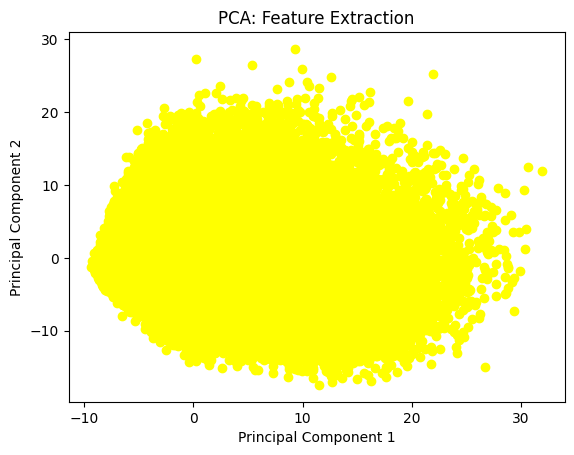

In [40]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

# Load the MNIST dataset (or any other image dataset)
mnist = fetch_openml('mnist_784')

# Preprocess the data
X = mnist.data
y = mnist.target

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)  # Set the desired number of components
X_transformed = pca.fit_transform(X_scaled)

# Plot the transformed data
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c='yellow', cmap='rainbow')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Feature Extraction')
plt.show()

# question 5

Min-Max scaling allows you to normalize the features in a way that preserves the relative differences between them. This is important for recommendation systems, as it ensures that features with larger scales (e.g., price) do not dominate the recommendation process compared to features with smaller scales (e.g., rating or delivery time).

After applying Min-Max scaling, the preprocessed data can be used as input for building the recommendation system, where the scaled features will contribute equally in determining the recommendations based on their relative importance.

In [42]:
# scaling the proposed features for a recommendation engine using minmaxscalar

from sklearn.preprocessing import MinMaxScaler
import pandas as pd

df = pd.DataFrame({
    'rating' : [4,3,5,2,5],
    'delivery_time' : [3 , 18 , 17 , 12 , 11 ],
    'price' : [350 ,400 ,280 , 640 , 700]
})

df

,rating,delivery_time,price
0,4,3,350
1,3,18,400
2,5,17,280
3,2,12,640
4,5,11,700


In [44]:
scalar = MinMaxScaler()
scalar.fit_transform(df)
pd.DataFrame(scalar.fit_transform(df) , columns = ['scaled_rating' , 'scaled_delivery_time' , 'scaled_price'])

,scaled_rating,scaled_delivery_time,scaled_price
0,0.666667,0.000000,0.166667
1,0.333333,1.000000,0.285714
2,1.000000,0.933333,0.000000
3,0.000000,0.600000,0.857143
4,1.000000,0.533333,1.000000


# question 6


When building a model to predict stock prices, dealing with a large number of features can pose challenges such as increased computational complexity, potential overfitting, and difficulty in interpreting the model. Principal Component Analysis (PCA) can be employed to address these issues by reducing the dimensionality of the dataset while retaining most of the relevant information.

Here's an overview of how PCA can be used to reduce the dimensionality of the stock price dataset:

1. Identify the features: Determine the features from the dataset that you want to include in the stock price prediction model. These features can include company financial data (e.g., revenue, earnings, debt) and market trends (e.g., stock indices, interest rates).

2. Standardize the data: To ensure that all the features are on a similar scale, it is advisable to standardize the dataset by subtracting the mean and dividing by the standard deviation of each feature. This step is important because PCA is sensitive to the scale of the features.

3. Apply PCA: Once the data is standardized, apply PCA to the dataset. PCA will identify the principal components, which are linear combinations of the original features. These components capture the maximum variance present in the data.

4. Determine the number of components: Decide on the number of principal components to retain. This can be based on the desired level of dimensionality reduction or by considering the cumulative explained variance ratio. The explained variance ratio indicates the amount of variance in the original dataset that is retained by each principal component. Choosing a higher number of components will retain more variance but may result in a higher-dimensional transformed dataset.

5. Transform the data: Transform the standardized dataset by projecting it onto the selected principal components. This results in a reduced-dimensional representation of the data, where each sample is represented by a reduced set of features.

6. Model training: Use the transformed dataset as input for training your stock price prediction model. The reduced-dimensional representation can help mitigate overfitting and improve model performance by focusing on the most important information captured by the principal components.

By using PCA to reduce the dimensionality of the dataset, you can simplify the input space for your stock price prediction model, remove any redundant or less informative features, and focus on the most significant information captured by the principal components. This can lead to improved model performance, better interpretability, and reduced computational complexity.

# question 7

In [49]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

df = pd.DataFrame({
    'values' : [1, 5, 10, 15, 20]
    })

In [51]:
scalar = MinMaxScaler(feature_range=(-1,1))
scalar.fit_transform(df)

array([[-1.        ],
       [-0.57894737],
       [-0.05263158],
       [ 0.47368421],
       [ 1.        ]])

In [53]:
pd.DataFrame(scalar.fit_transform(df) , columns = ['scaled_values'])

,scaled_values
0,-1.000000
1,-0.578947
2,-0.052632
3,0.473684
4,1.000000


# question 8 

In [106]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [55]:
df = pd.DataFrame({
    'height' : [130 , 120 , 144 , 122 ,110],
    'weight' : [34 , 54 , 75, 80 , 66],
    'age' : [10 , 14, 19, 33, 21],
    'gender' : ['male' , 'male' , 'female' , 'male' , 'female'],
    'blood_pressure' : ['100' , '120' , '110' , '105' , '114']
})

df

,height,weight,age,gender,blood_pressure
0,130,34,10,male,100
1,120,54,14,male,120
2,144,75,19,female,110
3,122,80,33,male,105
4,110,66,21,female,114


In [65]:
encoder = OneHotEncoder()
encoding = encoder.fit_transform(df[['gender']])

In [67]:
encoding.toarray()

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [74]:
final_df = df.drop('gender' , axis=1)

In [118]:
encoded_df = pd.DataFrame(encoding.toarray() , columns = ['female' , 'male'])

In [119]:
encoded_final_df = pd.concat([final_df , encoded_df] , axis=1)
encoded_final_df

,height,weight,age,blood_pressure,female,male
0,130,34,10,100,0.0,1.0
1,120,54,14,120,0.0,1.0
2,144,75,19,110,1.0,0.0
3,122,80,33,105,0.0,1.0
4,110,66,21,114,1.0,0.0


In [120]:
correlation_matrix = encoded_final_df.corr()
correlation_matrix

,height,weight,age,blood_pressure,female,male
height,1.000000,0.035495,-0.208289,-0.367475,0.129419,-0.129419
weight,0.035495,1.000000,0.858427,0.220087,0.431222,-0.431222
age,-0.208289,0.858427,1.000000,-0.079677,0.062704,-0.062704
blood_pressure,-0.367475,0.220087,-0.079677,1.000000,0.258841,-0.258841
female,0.129419,0.431222,0.062704,0.258841,1.000000,-1.000000
male,-0.129419,-0.431222,-0.062704,-0.258841,-1.000000,1.000000


<Axes: >

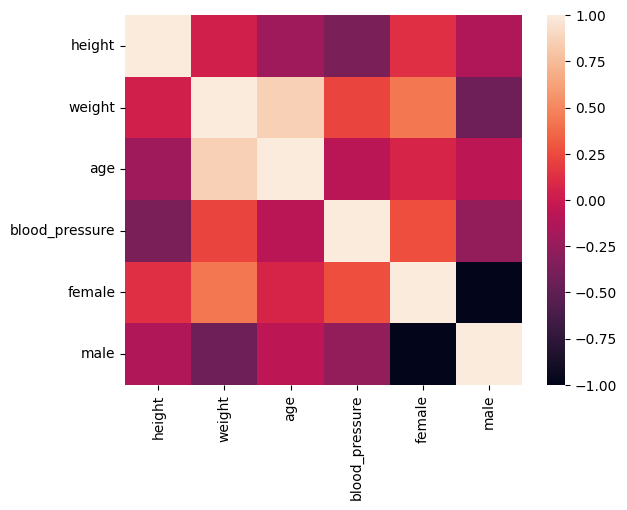

In [121]:
sns.heatmap(correlation_matrix)

In [122]:
scalar = StandardScaler()
data_scaled = scalar.fit_transform(encoded_final_df)
data_scaled

array([[ 0.42268197, -1.68760919, -1.20315226, -1.41215652, -0.81649658,
         0.81649658],
       [-0.45790547, -0.47350186, -0.69117257,  1.46979557, -0.81649658,
         0.81649658],
       [ 1.65550439,  0.80131084, -0.05119797,  0.02881952,  1.22474487,
        -1.22474487],
       [-0.28178798,  1.10483767,  1.74073093, -0.6916685 , -0.81649658,
         0.81649658],
       [-1.33849291,  0.25496254,  0.20479187,  0.60520994,  1.22474487,
        -1.22474487]])

In [123]:
pd.DataFrame(scalar.fit_transform(encoded_final_df) , columns = ['scaled_height' , 'scaled_weight' , 'scaled_age' , 'scaled_blood_pressure' , 'scaled_male', 'scaled_female']) 

,scaled_height,scaled_weight,scaled_age,scaled_blood_pressure,scaled_male,scaled_female
0,0.422682,-1.687609,-1.203152,-1.412157,-0.816497,0.816497
1,-0.457905,-0.473502,-0.691173,1.469796,-0.816497,0.816497
2,1.655504,0.801311,-0.051198,0.028820,1.224745,-1.224745
3,-0.281788,1.104838,1.740731,-0.691669,-0.816497,0.816497
4,-1.338493,0.254963,0.204792,0.605210,1.224745,-1.224745


In [124]:
cov_matrix = np.cov(data_scaled.T)
cov_matrix

array([[ 1.25      ,  0.0443688 , -0.26036176, -0.45934376,  0.16177424,
        -0.16177424],
       [ 0.0443688 ,  1.25      ,  1.07303404,  0.27510881,  0.53902725,
        -0.53902725],
       [-0.26036176,  1.07303404,  1.25      , -0.09959631,  0.07838056,
        -0.07838056],
       [-0.45934376,  0.27510881, -0.09959631,  1.25      ,  0.3235518 ,
        -0.3235518 ],
       [ 0.16177424,  0.53902725,  0.07838056,  0.3235518 ,  1.25      ,
        -1.25      ],
       [-0.16177424, -0.53902725, -0.07838056, -0.3235518 , -1.25      ,
         1.25      ]])

In [125]:
eigen_values , eigen_vectors = np.linalg.eig(cov_matrix)
eigen_values, eigen_vectors

(array([3.19076051e+00, 1.96221990e+00, 1.65320342e+00, 6.93816166e-01,
        1.07075345e-19, 5.51726269e-17]),
 array([[ 0.00445792,  0.35779945,  0.6688486 , -0.61116706, -0.00720092,
         -0.22558248],
        [ 0.50750146, -0.40238574,  0.17825735, -0.28900905,  0.02173259,
          0.68081436],
        [ 0.31174464, -0.66175035,  0.21368833,  0.08602522, -0.02044763,
         -0.64056068],
        [ 0.23591976,  0.0404951 , -0.68934172, -0.63934018, -0.00772322,
         -0.2419446 ],
        [ 0.54294546,  0.3677716 ,  0.00236267,  0.251786  ,  0.70416857,
         -0.03782974],
        [-0.54294546, -0.3677716 , -0.00236267, -0.251786  ,  0.70932695,
          0.12376621]]))

In [126]:
n_components = 4
sorted_indices = np.argsort(eigen_values)[::-1]
selected_components = eigen_vectors[:, sorted_indices[:n_components]]
sorted_indices , selected_components

(array([0, 1, 2, 3, 5, 4]),
 array([[ 0.00445792,  0.35779945,  0.6688486 , -0.61116706],
        [ 0.50750146, -0.40238574,  0.17825735, -0.28900905],
        [ 0.31174464, -0.66175035,  0.21368833,  0.08602522],
        [ 0.23591976,  0.0404951 , -0.68934172, -0.63934018],
        [ 0.54294546,  0.3677716 ,  0.00236267,  0.251786  ],
        [-0.54294546, -0.3677716 , -0.00236267, -0.251786  ]]))

In [127]:
transformed_data = np.dot(data_scaled, selected_components)

transformed_data

array([[-2.44943796,  0.96873775,  0.69438209,  0.61758718],
       [-0.99768594, -0.05697322, -1.55541975, -0.9936194 ],
       [ 1.73482426,  1.20580258,  1.22510177, -0.6494584 ],
       [ 0.05230959, -2.3259015 ,  0.85338355,  0.03370486],
       [ 1.65999005,  0.20833439, -1.21744765,  0.99178576]])

In [128]:
transformed_df = pd.DataFrame(transformed_data )

so i choose to retain 4 principal components according to the covariance matrix i computed. since those 4 played a huge role in the dataset.